## Random Forest

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import neighbors
from sklearn.svm import SVR

In [2]:
from warnings import filterwarnings
filterwarnings('ignore')

In [3]:
df = pd.read_csv("Hitters.csv")
df = df.dropna()
dms = pd.get_dummies(df[['League','Division','NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary','League','Division','NewLeague'],axis=1).astype('float64')
X = pd.concat([X_,dms[['League_N','Division_W','NewLeague_N']]],axis=1)
X_train,X_test,y_train,y_test = train_test_split(X,
                                                y,
                                                test_size=0.25,
                                                random_state=42)

### model & tahmin

In [4]:
rf_model = RandomForestRegressor(random_state = 42).fit(X_train, y_train)

In [6]:
y_pred = rf_model.predict(X_test)
np.sqrt(mean_squared_error(y_test,y_pred))

345.00286717448006

### model tuning

In [11]:
rf_params = {"max_depth":[5,8,10],
            "max_features":[2,5,10],
            "n_estimators":[200, 500, 1000,2000],
            "min_samples_split":[2,10,80,100]}

In [12]:
rf_cv_model = GridSearchCV(rf_model, rf_params, cv=10,n_jobs=-1, verbose= 2).fit(X_train,y_train)

Fitting 10 folds for each of 144 candidates, totalling 1440 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    6.8s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   37.4s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 997 tasks      | elapsed:  4.5min
[Parallel(n_jobs=-1)]: Done 1440 out of 1440 | elapsed:  6.5min finished


In [13]:
rf_cv_model.best_params_

{'max_depth': 8,
 'max_features': 2,
 'min_samples_split': 2,
 'n_estimators': 200}

In [14]:
rf_tuned = RandomForestRegressor(random_state=42,
                                max_depth=8,
                                max_features=2,
                                min_samples_split=2,
                                n_estimators=200)
rf_tuned = rf_model.fit(X_train,y_train)

In [16]:
y_pred = rf_tuned.predict(X_test)

In [17]:
np.sqrt(mean_squared_error(y_test,y_pred))

345.00286717448006

### Değişken Önem Düzeyi

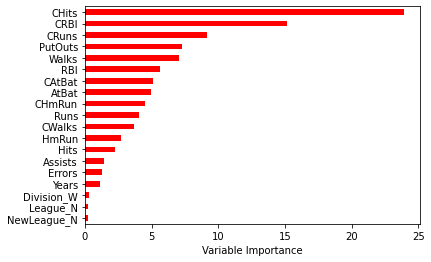

In [19]:
Importance = pd.DataFrame({'Importance':rf_tuned.feature_importances_*100},
                         index = X_train.columns)

Importance.sort_values(by= 'Importance',
                      axis = 0,
                      ascending = True).plot(kind= 'barh',
                                             color = 'r',)
plt.xlabel('Variable Importance')
plt.gca().legend_=None
